# Chapter 4 - Training Models

## Signs Used in This `IPythonNotebook`
- I have Used **Exit** Heading for Writing a Paragraph or a Text That Does't Fall under any Heading.
- I have Used **Bold** Font to Highlight a Name or an Important Text.
- I have Used `This` Type of Highlighter for Programming name or a Small Code.
   - For Example :- `python`, `numpy`, `ndarray`, `pandas`, `DataFrame`, `loc`, `iloc`
- I have used *Italic* Font For Some Important but not so Important Text.

So Far We Have Treated Our Machine Learning Models Like Black Boxes and Many of You Have Wondered that What We Can Do Without Knowing Even a Little Thing about How Things Work Under-The-Hood However Knowing How Things Work Can Help us in Many Different Ways One of Then is *Fine Tuning* Models. But in This Chapter Finally We are Going to Look at **How Things Work Under the Hood**.

## What We are going to Learn.
- Linear Regression
 - The Normal Equation
  - Computational Complexity
- Gradient Descent
  - Batch Gradient Descent
  - Stochastic Gradient Descent
  - Mini-Batch Gradient Descent
- Polynomial Regression
- Learning in Curves
- Regularized Linear Models
  - Ridge Regression
  - Lasso Regression
  - Elastic Net
  - Early Stopping
- Logistic Regression
  - Estimating Probabilities
  - Training and Cost Function
  - Decision Boundaries
  - Softmax Regression

# Linear Regression
This is the Main Equation in Which **Linear Regression** Model Relies on.
$$
\hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_n x_n
$$

### Equation 4-1
Let's say we have a dataset of housing prices in a certain area, and we want to predict the price of a house based on its size (in square feet) and the number of bedrooms. We can model this problem using linear regression, with the price of the house being the target variable and the size and number of bedrooms being the input features. 

Using Equation 4-1, we can express the linear regression model as:

$$
\hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2,
$$

where:

- $\hat{y}$ is the predicted price of the house,
- $x_1$ is the size of the house (in square feet),
- $x_2$ is the number of bedrooms,
- $\theta_0$ is the intercept term (representing the base price of the house),
- $\theta_1$ is the weight of the size feature (representing how much the price of the house increases per square foot),
- $\theta_2$ is the weight of the number of bedrooms feature (representing how much the price of the house increases per additional bedroom).

To train the linear regression model, we need a dataset of labeled examples, where each example consists of the input features (size and number of bedrooms) and the corresponding label (price of the house). Let's say we have the following dataset:

<div align="center">

| Size (sq. ft.) | Bedrooms | Price ($) |
| --- | --- | --- |
| 1500 | 3 | 220000 |
| 2000 | 4 | 300000 |
| 1200 | 2 | 180000 |
| 1800 | 3 | 240000 |
| 1600 | 3 | 210000 |

</div>

Using this dataset, we can estimate the values of the parameters $\theta_0$, $\theta_1$, and $\theta_2$ that minimize the difference between the predicted prices and the actual prices of the houses in the training data. We can then use these parameters to make predictions for new houses.

For example, let's say we want to predict the price of a house that is 1700 square feet and has 3 bedrooms. We can plug these values into Equation 4-1 and use the learned values of $\theta_0$, $\theta_1$, and $\theta_2$ to compute the predicted price as follows:

$$
\begin{aligned}
\hat{y} &= \theta_0 + \theta_1 x_1 + \theta_2 x_2 \\
&= 150000 + 100 \times 1700 + 50000 \times 3 \\
&= 425000
\end{aligned}
$$

So according to the linear regression model, the predicted price of the house is $425000. Of course, the actual price may differ from the predicted price due to factors not captured by the input features, but the linear regression model provides a useful estimate based on the available information.

### Equation 4-3 
It represents the mean squared error (MSE) cost function for linear regression. The MSE measures the average squared difference between the predicted values y_hat and the actual values y in the training dataset.

$$
\text{MSE}(\mathbf{X},h_{\boldsymbol{\theta}}) = \frac{1}{m}\sum_{i=1}^{m}\left(\hat{y}^{(i)} - y^{(i)}\right)^2
$$

- $\text{MSE}(\mathbf{X},h_{\boldsymbol{\theta}})$ is the cost function that we want to minimize. It takes as input the training dataset $\mathbf{X}$ and the linear regression model $h_{\boldsymbol{\theta}}$ with parameter values $\boldsymbol{\theta}$.
- $m$ is the number of instances in the training dataset.
- $y^{(i)}$ is the actual value of the target variable for the $i$-th instance in the training dataset.
- $\hat{y}^{(i)}$ is the predicted value of the target variable for the $i$-th instance in the training dataset, based on the model's current parameter values.
- $(\hat{y}^{(i)} - y^{(i)})$ is the difference between the predicted and actual values for the $i$-th instance.
- $(\hat{y}^{(i)} - y^{(i)})^2$ is the squared difference between the predicted and actual values for the $i$-th instance.
- $\frac{1}{m}$ is a scaling factor that averages the squared differences over all instances in the training dataset.

In other words, Equation 4-3 computes the average squared difference between the predicted and actual values for all instances in the training dataset. This cost function is commonly used in linear regression because it is a convex function, meaning that it has a single global minimum that can be found efficiently using gradient descent or other optimization algorithms.

### Equation 4-4 
It represents the gradient vector of the mean squared error (MSE) cost function for linear regression. The gradient vector is a vector of partial derivatives of the cost function with respect to each of the model parameters $\theta_0, \theta_1, \dots, \theta_n$.

The gradient vector of the MSE cost function is used in optimization algorithms such as gradient descent to update the model parameters at each iteration. The direction of the gradient vector points in the direction of the steepest increase in the cost function, so the negative gradient vector points in the direction of the steepest decrease in the cost function, which is the direction of the fastest improvement in the model's performance.

Here is a breakdown of the terms in Equation 4-4:

- $\nabla_{\boldsymbol{\theta}}\text{MSE}(\boldsymbol{\theta})$ is the gradient vector of the MSE cost function with respect to the model parameters $\boldsymbol{\theta}$.
- $\boldsymbol{\theta}$ is a vector of the model parameters $\theta_0, \theta_1, \dots, \theta_n$.
- $\frac{2}{m}$ is a scaling factor that makes the gradient vector proportional to the number of instances in the training dataset.
- $\mathbf{X}$ is the feature matrix of the training dataset, where each row corresponds to an instance and each column corresponds to a feature.
- $\mathbf{X}^T$ is the transpose of the feature matrix, which has the same number of rows as the number of features and the same number of columns as the number of instances.
- $\mathbf{X}\boldsymbol{\theta}$ is a vector of predicted target values for all instances in the training dataset.

In other words, Equation 4-4 computes the partial derivatives of the MSE cost function with respect to each of the model parameters. This gradient vector is used to update the model parameters iteratively in order to minimize the cost function and improve the model's performance on the training dataset.

Now Let's Create a Linear Looking Dataset With Numpy.

In [1]:
import numpy as np

x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.rand(100, 1)

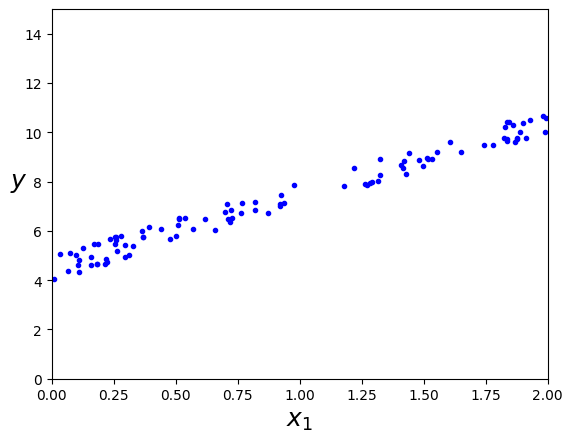

In [2]:
import matplotlib.pyplot as plt

plt.plot(x, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()